<center><b>© Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<center>


<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/Regularized_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
      </table>
        <br><br></br> 

#Introduction to Regularized Linear Regression

 This notebook will give you a brief introduction to the concept of Regularization, with a focus on Regularized Linear Regressio.
 
Most of the notebooks we are going to be using are inspired from existing notebooks that available online and are made free for educational purposes. Nonetheless, this notebook should not be share without prior permission of the instructor. When working in an assignment always remember the Student Code of Conduct. 


*The following sections were inspired and uses code and text from the notebook:

Géron, A. (2019)   2nd Ed. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. O'Reilly Media, Inc.( ISBN-10: 1491962291) [Chapter 4](https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb)


VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data.  O'Reilly Media, Inc. (ISBN-10 1491912057) [Chapter 5](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb)

# Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
#Scikit-learn for implemeting LinearRegression from a existing algorithm.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Common imports
import numpy as np
import os

from IPython.display import clear_output

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)


def computeCost(X, y, theta):
    return 1/(2*y.size)*np.sum(np.square(X.dot(theta)-y))

Text(0, 0.5, '$y$')

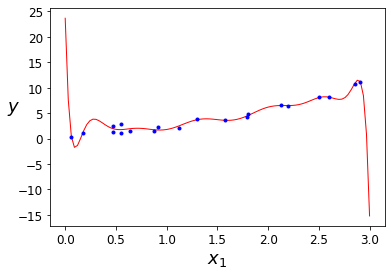

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + X**2 + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


Degree_of_the_Polynomial_Model=13 #@param {type:"integer", min:1, max:14, step:1}
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


style="g-" 
width=1
polybig_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()


polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)

plt.plot(X_new, y_newbig, "r", linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)


Adding more term to our model improves the MSE, but it could impact generalizability. A way to mitigate this issue is using Regularization.

## 1- Ridge Regression


Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization).
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \lambda\sum_{j=1}^N \theta_j^2
$$
Where $\lambda$ is a free parameter that controls the strength of the penalty. 

The $\lambda$ parameter is essentially a knob controlling the complexity of the resulting model.

In the limit $\lambda \to 0$, we recover the standard linear regression result; in the limit $\lambda \to \infty$, all model responses will be suppressed.

One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.



### 1.2 - Ridge Regression Implementation 

The objective of Ridge Linear Regression is to minimize the cost function as shown below, which is similar to the cost function for the non-regularized linear regression, but with the additional regularization term!.

$$ J(\theta) = \frac{1}{2m} \left[ \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 + \lambda\sum_{j=1}^N \theta_j^2 \right]$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x^{(i)}+ ... +\theta_n x^{(i)} $$

Sice we don't want to regulazied our $\theta_0$, just our $\theta_j$ for $j=1,2,3,...,n$, the update rules becomes:

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)$$

$$ \theta_j = \theta_j - (1-\alpha \frac{\lambda}{m} ) - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)}\quad     \forall\quad   j=\{1,2,...,N\} $$  

$$ \qquad \text{simultaneously update }$$





In [ ]:
def RidgeRegression_gradientDescent(X, y, theta, alpha, lambda_term, num_iters):
    """
    Performs Ridge Linear Regression with a vectorized gradient descent to learn `thetas`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m x 1 ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1 x 1).
    
    alpha : float
        The learning rate.

    lambda_term : float
        The regularization term.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1 x 1 ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.

    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions!!!
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    ### START CODE HERE ### (≈ 5 lines of code)
    for i in range(num_iters):



        # save the cost J in every iteration
        theta[0,0]=theta0_temp[0,0] #We dont want to regularized our bias/intercep term (theta_0) 
    ### END CODE HERE ###
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

Lets test your code

In [ ]:

#Create polynomial features
Degree_of_the_Polynomial_Model=5
#"include_bias=False" since we dont want to normalized the intercep/bias term
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Get the Mean and SD used to normalize the data, so we can apply it to our testing
X_scale=std_scaler.fit(X_poly)

#Scaling our data is key for Regularized LR to work
X_poly=std_scaler.fit_transform(X_poly)
#If you comment the line above you will see gradient descent will not work well (or at all)
X_poly = np.hstack([np.ones(shape=(y.size,1)), X_poly])

# initialize fitting parameters (n+1)
theta= np.zeros(Degree_of_the_Polynomial_Model+1).reshape(Degree_of_the_Polynomial_Model+1,1)

# some gradient descent settings
num_iters = 5000  #8000
alpha = 0.1       #0.3
lambda_term=0.02

theta, J_history = RidgeRegression_gradientDescent(X_poly ,y, theta, alpha, lambda_term,num_iters)

print(theta)
theta_cost=computeCost(X_poly, y, theta)
print("Cost value= {}".format(round(theta_cost,4)))

#You can plot your  cost over the gradient descent iterations
# plt.plot(J_history)
# plt.xlim(xmin=0.0)
# plt.ylabel('Cost J')
# plt.xlabel('Iterations');


[[4.19953864]
 [1.30196796]
 [0.32908675]
 [0.63726378]
 [0.56239658]
 [0.4021741 ]]
Cost value= 0.1418


**Expected output:**

For Degrees=5, alpha=0.1, num_iters=1000, lambda_term=0.02
```
[[ 1.50467735]
 [ 0.46207351]
 [-0.53060374]
 [-0.25546617]
 [ 0.16649222]
 [ 0.58154243]]
Cost value= 0.1477
```



## 1.3 - Ridge Regression with scikit-learn 

Here is the code on how to run the same Ridge Linear Regression using scikit-learn

In [ ]:
#Import Ridge Linear Regression
from sklearn.linear_model import Ridge

#Set the hyperparameter
ridge_reg = Ridge(alpha=lambda_term)

#Lets pass out X matrix with the polynomial terms
ridge_reg.fit(X_poly, y)

#Lets get the thetas
coe=ridge_reg.coef_
interc=ridge_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_sklearn=np.vstack([interc,coe[1:, :]])
print(theta_sklearn)
theta_sklearn_cost=computeCost(X_poly, y, theta_sklearn)
print("Cost value= {}".format(round(theta_sklearn_cost,4)))



[[ 4.19953864e+00]
 [ 1.39273319e+00]
 [-3.65351545e-03]
 [ 9.23693015e-01]
 [ 6.89058765e-01]
 [ 2.30658734e-01]]
Cost value= 0.1413


Lets plot our  models

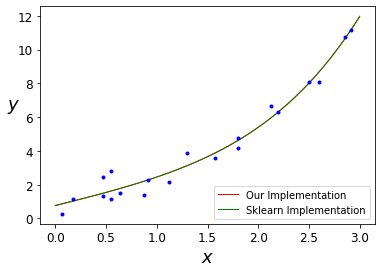

In [ ]:
#Lets create some new data to create a line
X_new = np.linspace(0, 3, 100).reshape(100, 1)
#Add some polynomial term to this data
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_new_poly = poly_features.fit_transform(X_new)

#WE NEED TO SCALE OUR DATA BASED ON THE SCALE WE USE FOR TRAINING!!!!
X_new_poly_sclae=X_scale.transform(X_new_poly)

#Add Theta_0
X_new_poly_sclae_0 = np.hstack([np.ones(shape=(X_new.size,1)), X_new_poly_sclae])

#Lets cacuate our model (h, y_hat)
y_newbig_theta= X_new_poly_sclae_0.dot(theta)
y_newbig_theta_sklearn= X_new_poly_sclae_0.dot(theta_sklearn)


#Plot models
plt.plot(X_new, y_newbig_theta, "r", linewidth=width, label='Our Implementation')
plt.plot(X_new, y_newbig_theta_sklearn, "g", linewidth=width,  label='Sklearn Implementation')


plt.plot(X, y, "b.", linewidth=3)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc=4);




#### Ridge Regression hyperparameters: degree of polynomial and $\lambda$

Text(0, 0.5, '$y$')

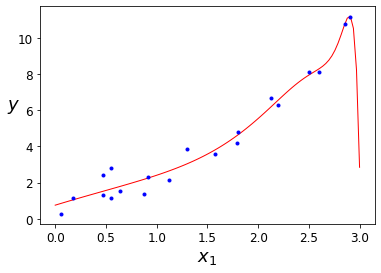

In [ ]:
X_new = np.linspace(0, 3, 100).reshape(100, 1)
style="g-" 
width=1
Degree_of_the_Polynomial_Model=50 #@param {type:"integer", min:1, max:14, step:1}
lambda_term=0.02  #@param 
polybig_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
std_scaler = StandardScaler()
Ridge_lin_reg = Ridge(alpha=lambda_term)


polynomial_ridge_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("Ridge_lin_reg", Ridge_lin_reg),
    ])
polynomial_ridge_regression.fit(X, y)
y_newbig = polynomial_ridge_regression.predict(X_new)

plt.plot(X_new, y_newbig, "r", linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)


## 2- Lasso Regression


Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm


The objective of Lasso Linear Regression is to minimize the cost function as shown below, which is similar to the cost function for the non-regularized linear regression, but with the additional regularization term (ℓ1 norm).

$$ J(\theta) = \frac{1}{2m} \left[ \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 + \lambda\sum_{j=1}^N |\theta_j|\right]$$

The Lasso cost function is not differentiable at $\theta_i$ = 0 (for i = 1, 2, ⋯, n), but Gradient Descent still works fine if you use a subgradient vector instead (see Hands-on Machine Learning book  2nd ed, pag 140)

## 2.1 - Lasso Regression with scikit-learn 

In [ ]:
#Import Lasso  Linear Regression
from sklearn.linear_model import Lasso

#Set the hyperparameter
lasso_reg = Lasso(alpha=lambda_term)

#Lets pass out X matrix with the polynomial terms
lasso_reg.fit(X_poly, y)

#Lets get the thetas
coe=lasso_reg.coef_
interc=lasso_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_sklearn=np.vstack([interc,coe[1:, :]])
print(theta_sklearn)
theta_sklearn_cost=computeCost(X_poly, y, theta_sklearn)
print("Cost value= {}".format(round(theta_sklearn_cost,4)))

[[4.19953864]
 [1.32177433]
 [0.        ]
 [1.14229352]
 [0.58163381]
 [0.16011634]]
Cost value= 0.1416


#### Lasso Regression hyperparameters: degree of polynomial and $\lambda$

Text(0, 0.5, '$y$')

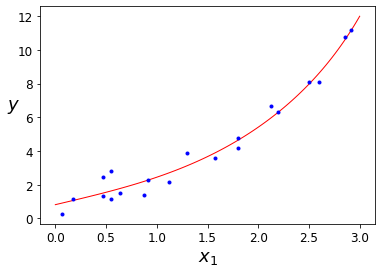

In [ ]:
X_new = np.linspace(0, 3, 100).reshape(100, 1)

style="g-" 
width=1

Degree_of_the_Polynomial_Model=10 #@param {type:"integer", min:1, max:14, step:1}
lambda_term=0.02  #@param 

polybig_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
std_scaler = StandardScaler()
lasso_reg = Lasso(alpha=lambda_term)

polynomial_lasso_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lasso_reg", lasso_reg),
    ])
polynomial_lasso_regression.fit(X, y)
y_newbig = polynomial_lasso_regression.predict(X_new)

plt.plot(X_new, y_newbig, "r", linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)


### So when should you use plain Linear Regression (i.e., without any regularization),Ridge, Lasso, or Elastic Net? 

It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero, as we have discussed.